# USA Accidental Deaths 1973-78

### Contents
* Common Functions
* Data
* Seasonality Difference with lag = 4
* Log-Return Transformation
* Order Estimation Using SARIMA Model
* Residual Analysis
* Forecasting Using "forecast" library
* Forecasting Using "sarima.for" library
* References

In [47]:
#Required Libraries
library("datasets")
library("repr")
library("forecast")
library("astsa")

### Common functions

In [12]:
# Function to plot the graph as per given size
figsize <- function(w=12, h=6){
    options(repr.plot.width=w, repr.plot.height=h)
}

#function to plot series, ACF and PACF plot
ts_acf_pacf_plot <- function(data, title='Time Series'){
    plot( data, main = title)
    acf( data, main="ACF")
    pacf( data, main="PACF")
}

### Data

In [13]:
#Data
data(USAccDeaths)

In [18]:
help(USAccDeaths)

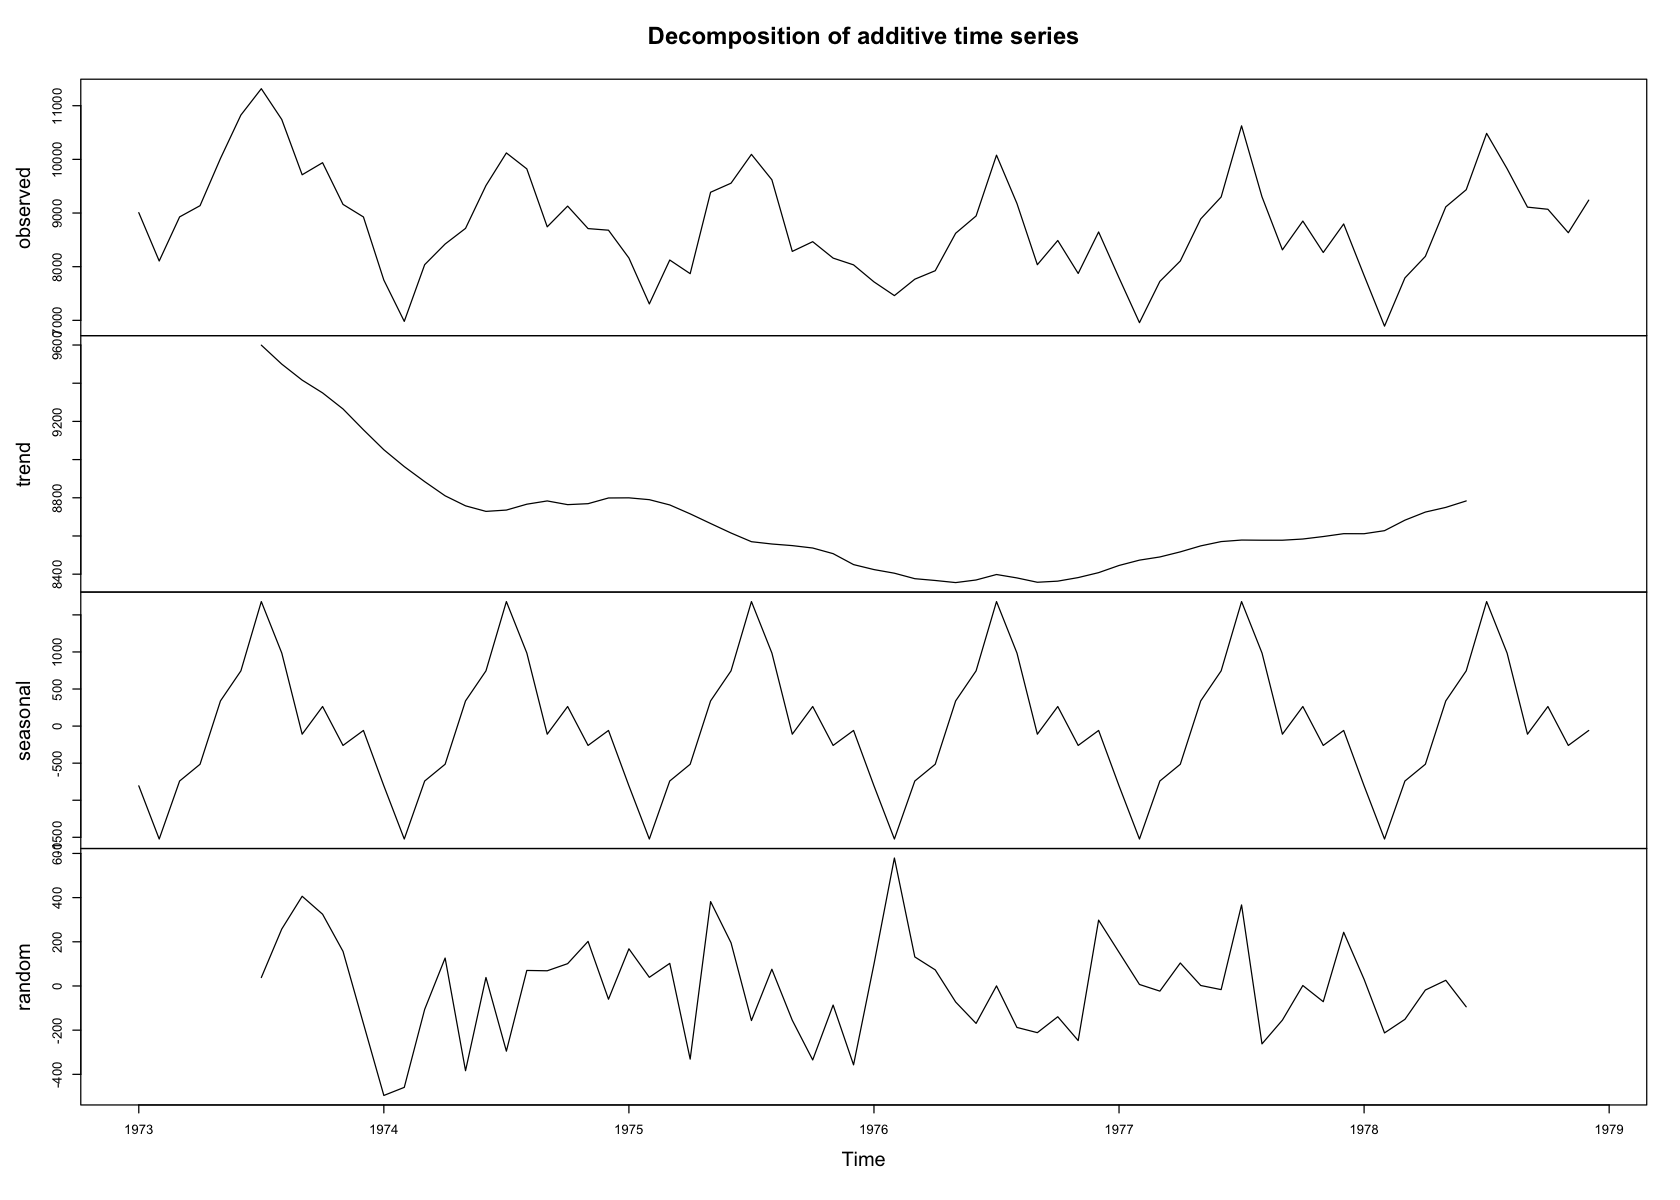

In [16]:
figsize(14,10)
plot(decompose(USAccDeaths))

#### Future values for our reference
The values for the first six months of 1979 are 7798 7406 8363 8460 9217 9316.

In [19]:
USAccDeaths

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8466,8160,8034
1976,7717,7461,7767,7925,8623,8945,10078,9179,8037,8488,7874,8647
1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
1978,7836,6892,7791,8192,9115,9434,10484,9827,9110,9070,8633,9240


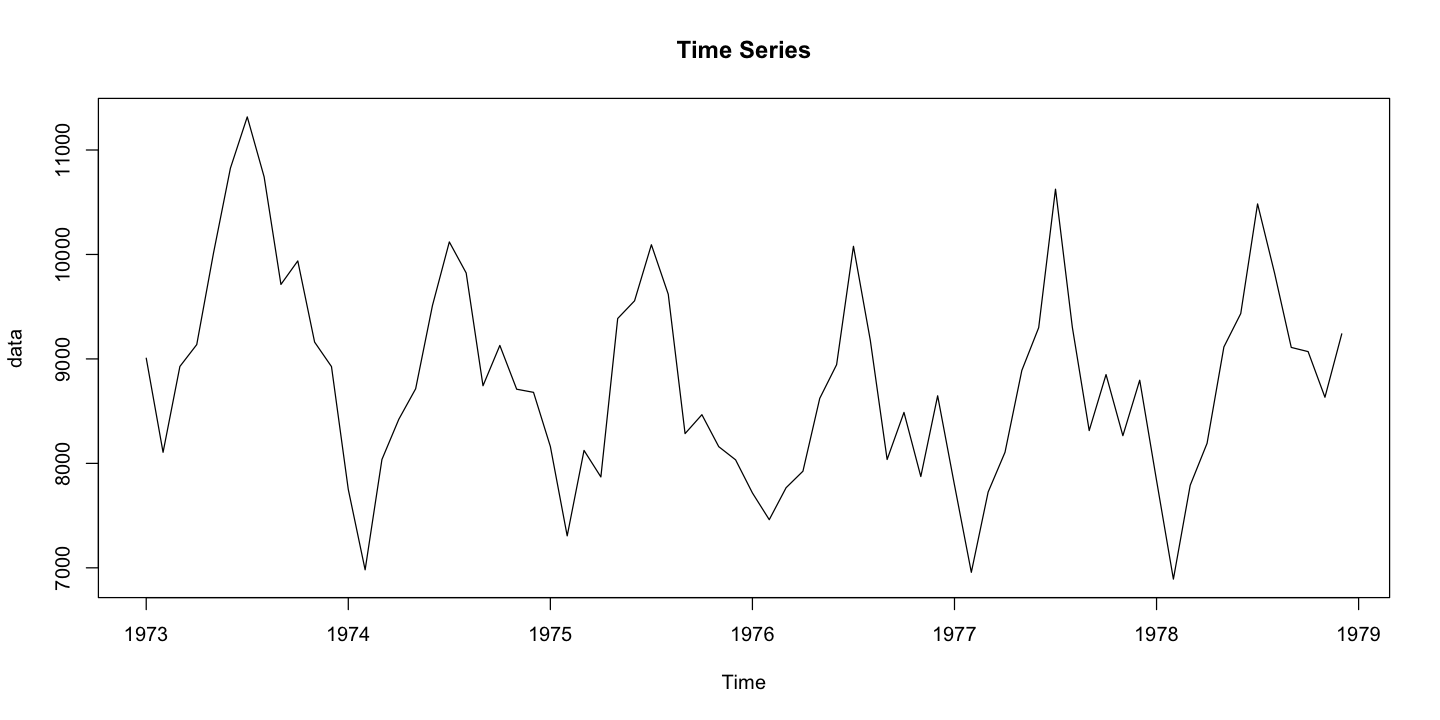

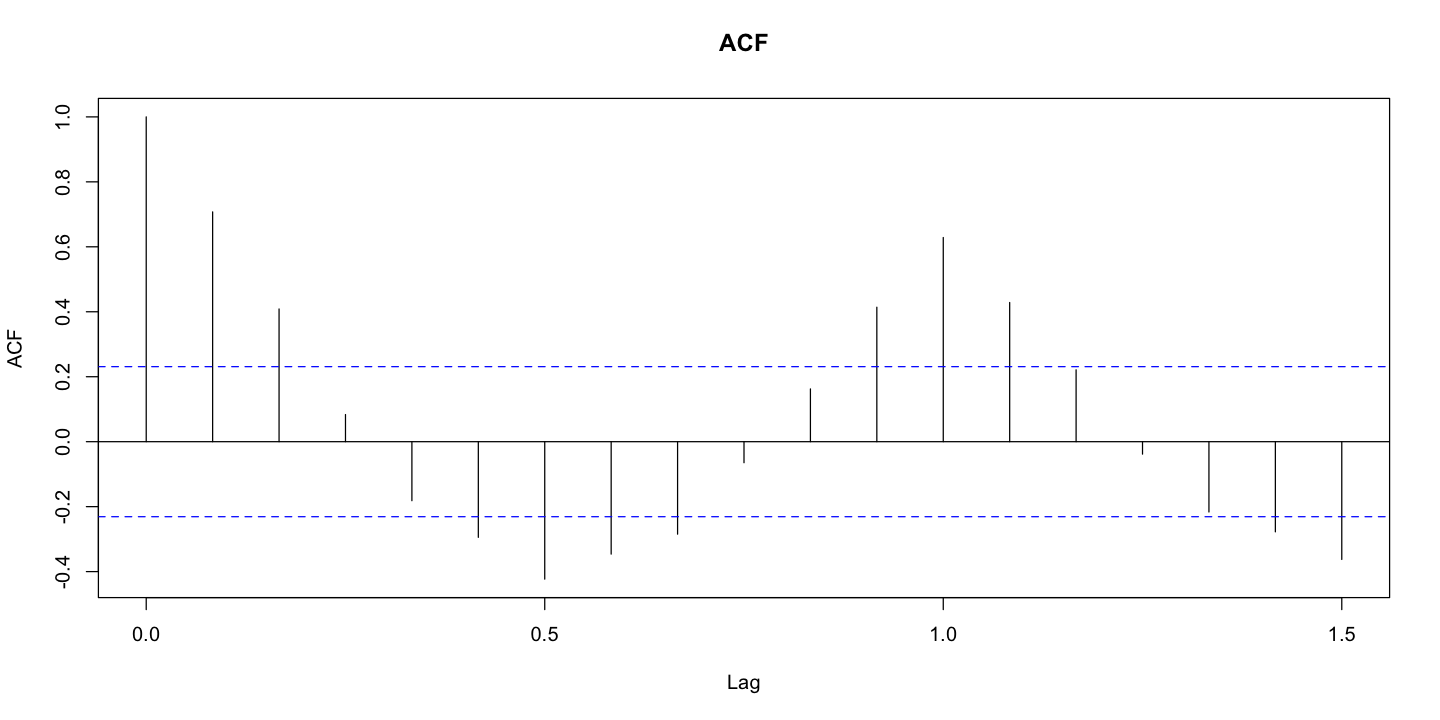

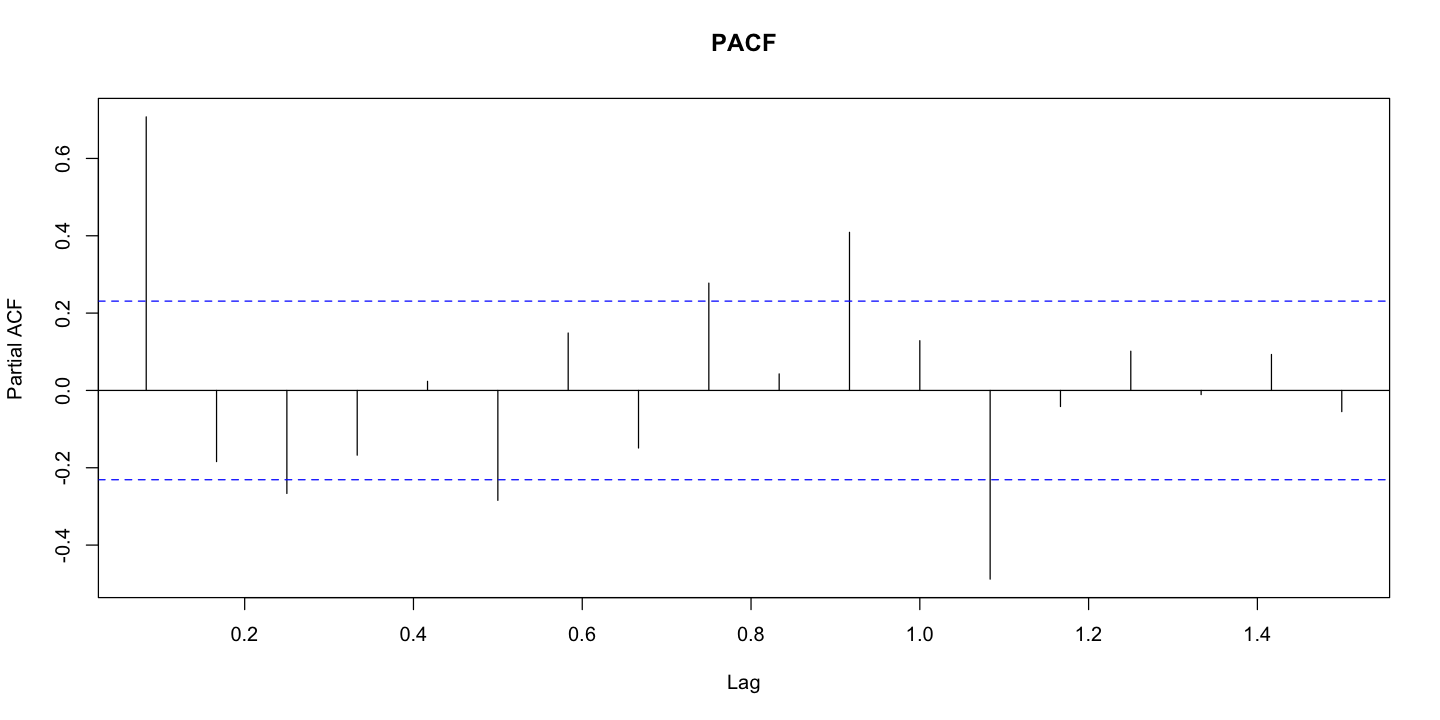

In [25]:
figsize(12,6)
ts_acf_pacf_plot(USAccDeaths)

### Seasonal Differencing with lag = 12

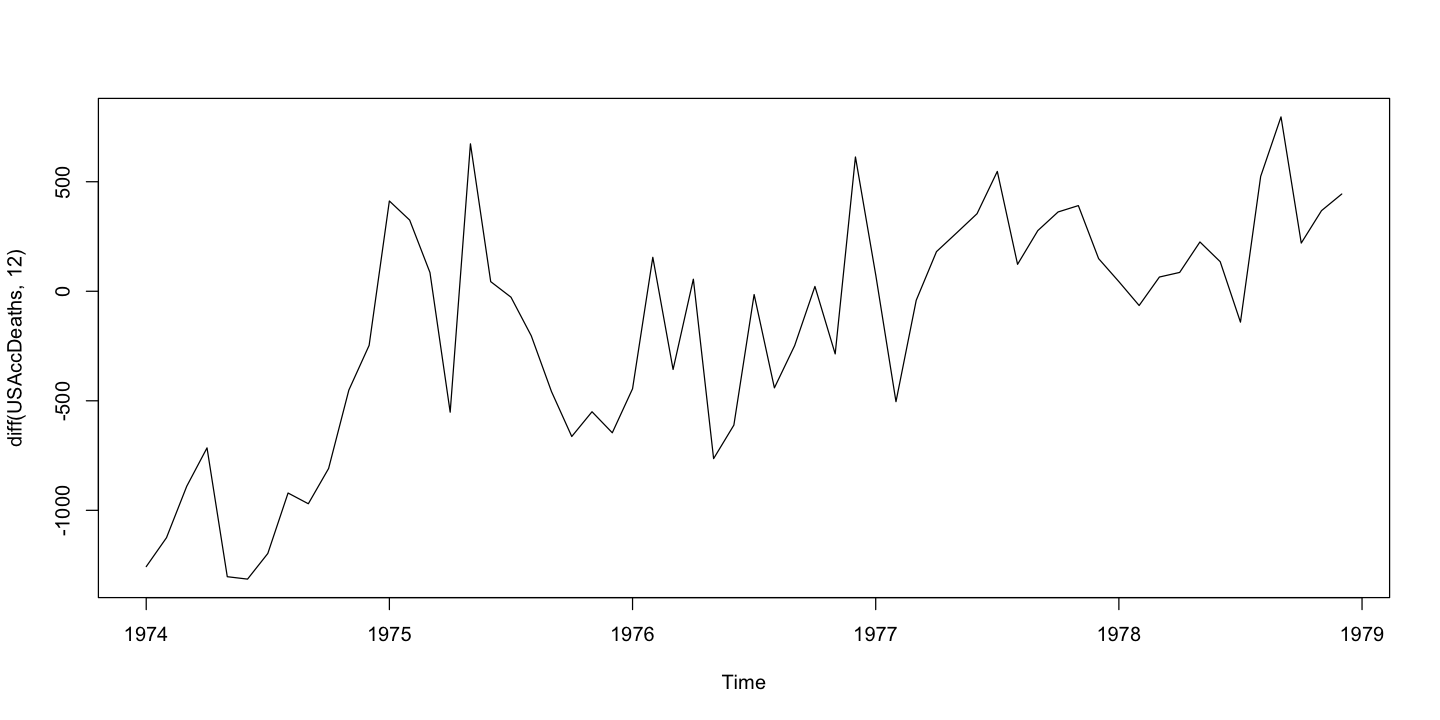

In [27]:
plot(diff(USAccDeaths, 12))

<b>Interpretation:</b><br>
* After doing seasonal differencing, we can see the general trend and variance is not constant. Now, we're gonna do log-return transformation

### Log-Return Transformation

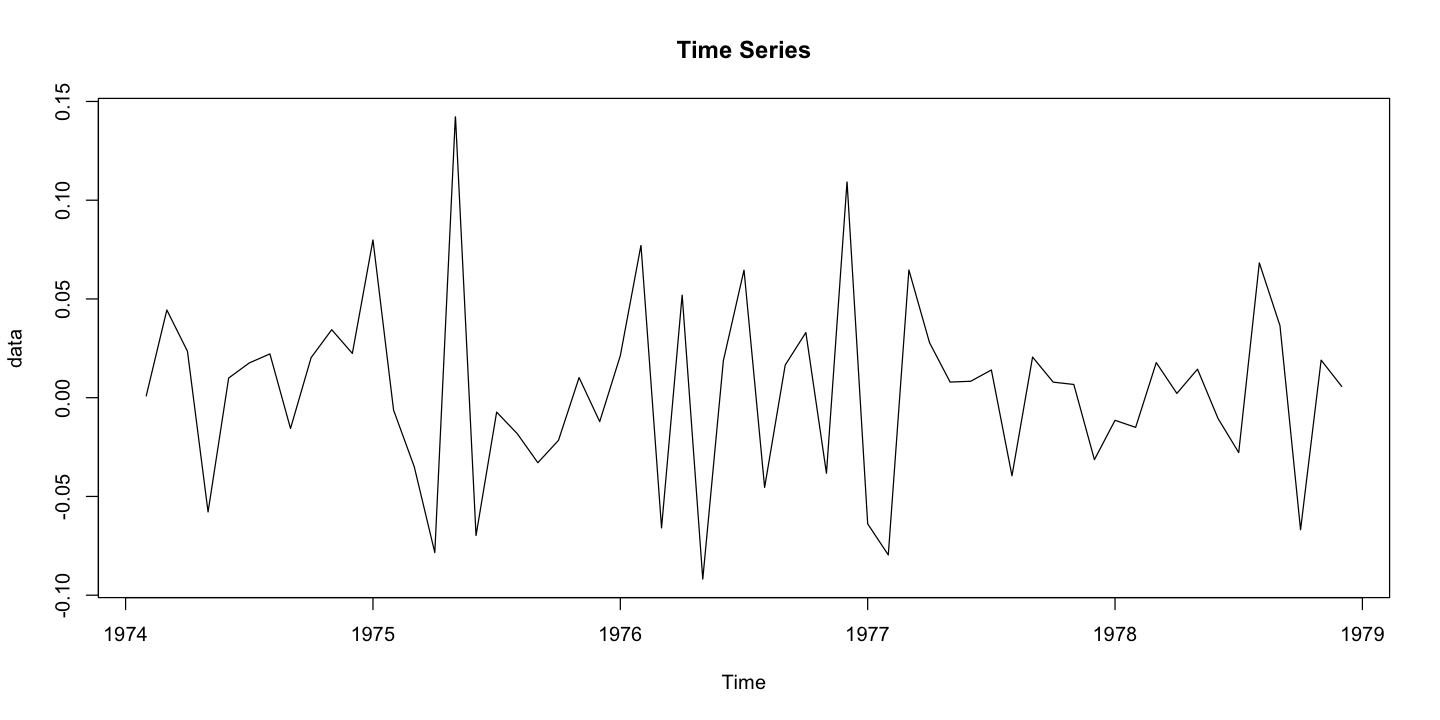

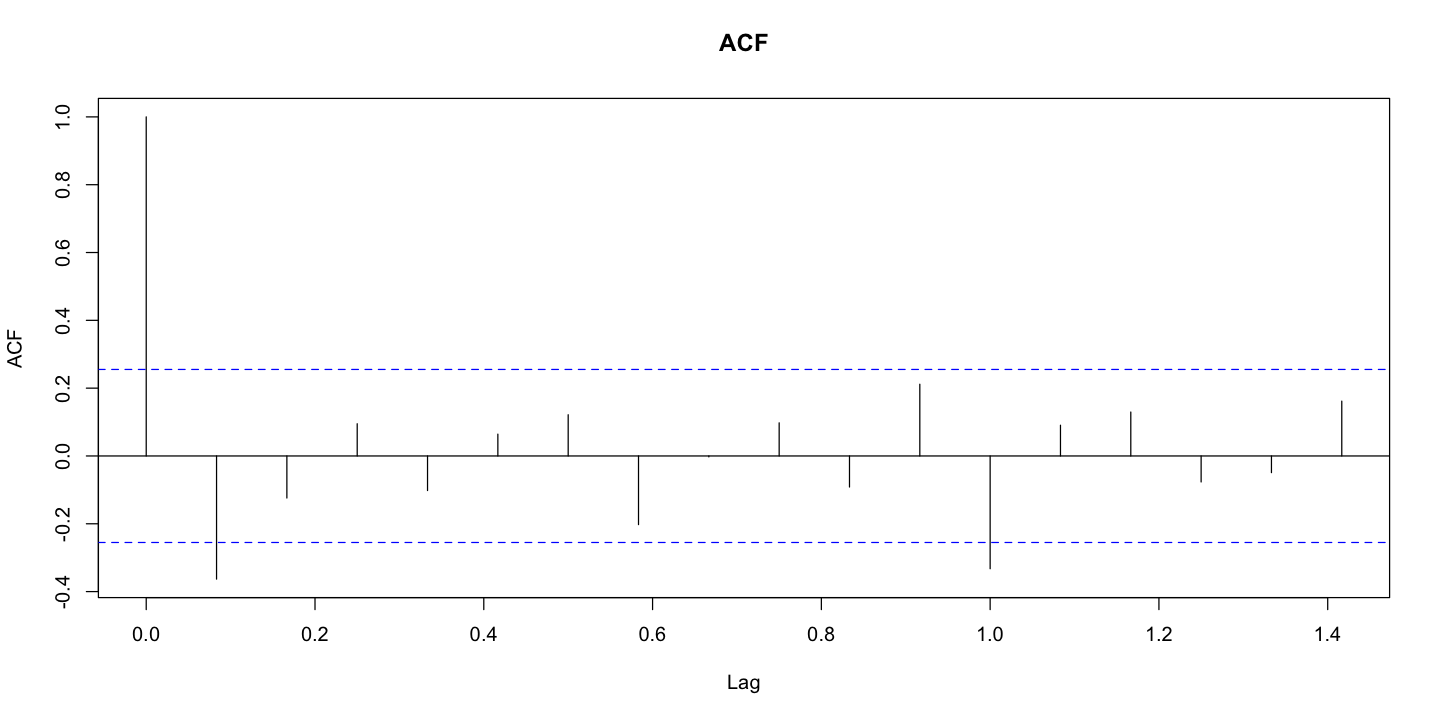

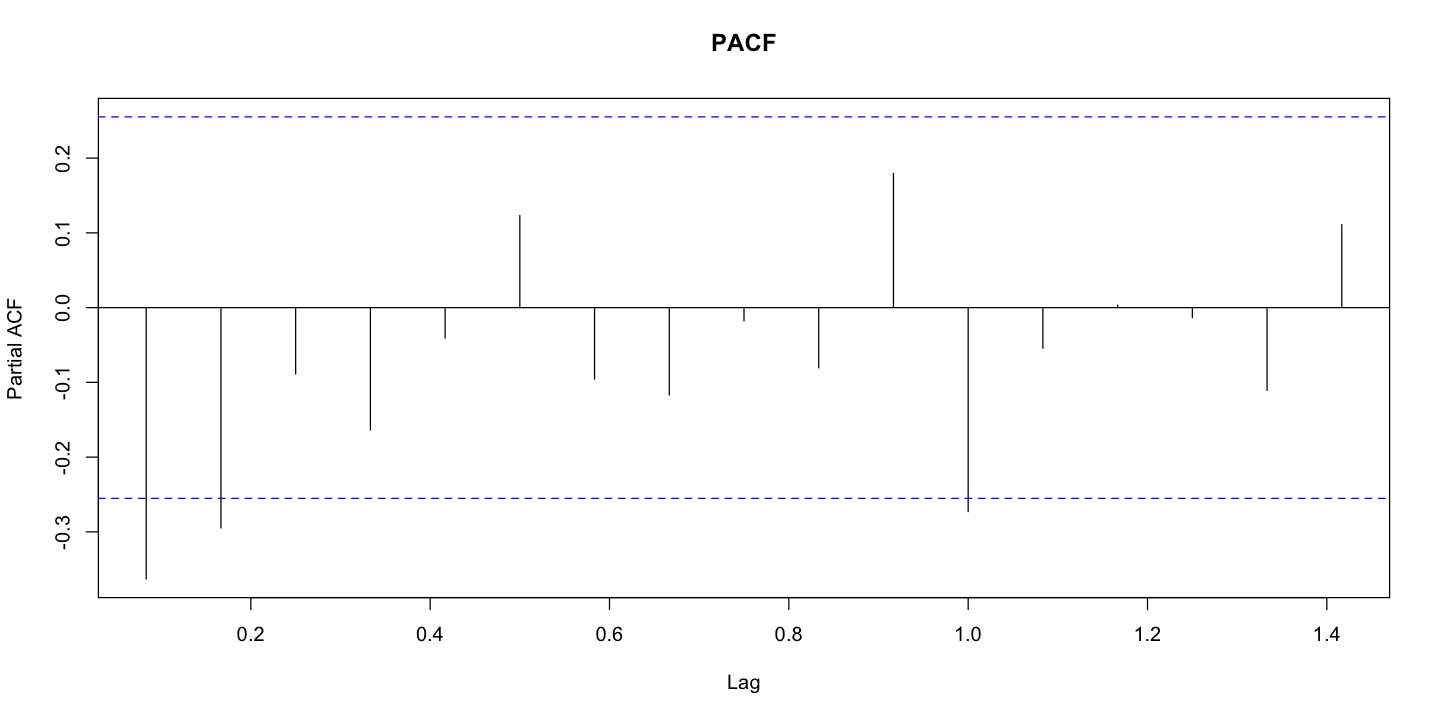

In [35]:
acData = diff(diff(log(USAccDeaths)), 12)
ts_acf_pacf_plot(acData)

<b>Interpretation:</b><br>

<b>Order of AR and Seasonal AR terms</b><br>
* The significant partial autocorrelation coefficient at lag 12 suggests the order of seasonal AR term, P≤1.
* Significant adjacent lags in PACF suggest the order of AR terms, p≤2.

<b>Order of MA and Seasonal MA terms</b><br>
* The significant autocorrelation coefficient at lag 12 suggests the order of seasonal MA term, Q≤1.
* Significant adjacent lags in ACF suggest the order of MA terms, q≤1.

### Order Estimation

In [37]:
d = 1
DD = 1
per = 12

# Estimating order by fitting multiple combinations of p,d,q,P,D,Q using SARIMA modelling
for(p in 1:3){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
        
        # SARIMA Modelling
          model<-arima(x=log(USAccDeaths), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
        
        # Ljung-Box test to check auto-correlation in residuals
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
        
        # Sum of squared errors of residuals
          sse<-sum(model$residuals^2)
        
        # Printing the output
          cat(p-1,d,q-1,i-1,DD,j-1,"Seasonality=",per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 Seasonality= 12 AIC= -193.9245  SSE= 0.1259244  p-VALUE= 0.02664126 
0 1 0 0 1 1 Seasonality= 12 AIC= -204.4485  SSE= 0.09240893  p-VALUE= 0.02557938 
0 1 0 1 1 0 Seasonality= 12 AIC= -199.0315  SSE= 0.1090362  p-VALUE= 0.01720914 
0 1 0 1 1 1 Seasonality= 12 AIC= -203.7732  SSE= 0.07588077  p-VALUE= 0.03691009 
0 1 1 0 1 0 Seasonality= 12 AIC= -204.7273  SSE= 0.1010273  p-VALUE= 0.8875553 
0 1 1 0 1 1 Seasonality= 12 AIC= -212.6262  SSE= 0.07861714  p-VALUE= 0.6652379 
0 1 1 1 1 0 Seasonality= 12 AIC= -208.7744  SSE= 0.08922592  p-VALUE= 0.7103418 
0 1 1 1 1 1 Seasonality= 12 AIC= -211.8337  SSE= 0.06452905  p-VALUE= 0.7543455 
1 1 0 0 1 0 Seasonality= 12 AIC= -199.7846  SSE= 0.1101173  p-VALUE= 0.1826886 
1 1 0 0 1 1 Seasonality= 12 AIC= -209.1155  SSE= 0.08216884  p-VALUE= 0.2298692 
1 1 0 1 1 0 Seasonality= 12 AIC= -204.12  SSE= 0.09674418  p-VALUE= 0.1664463 
1 1 0 1 1 1 Seasonality= 12 AIC= -208.4552  SSE= 0.06779725  p-VALUE= 0.2629087 
1 1 1 0 1 0 Seasonality= 12 AI

<b>Interpretation</b><br>
Our objective is to find a combination with
* High p-value
* Lowest AIC
* Lowest SSE
* Comply to Parsimonius principle <br>

According to above conditions, we rounded our answer to <b>(0,1,1,0,1,1).</b><br>
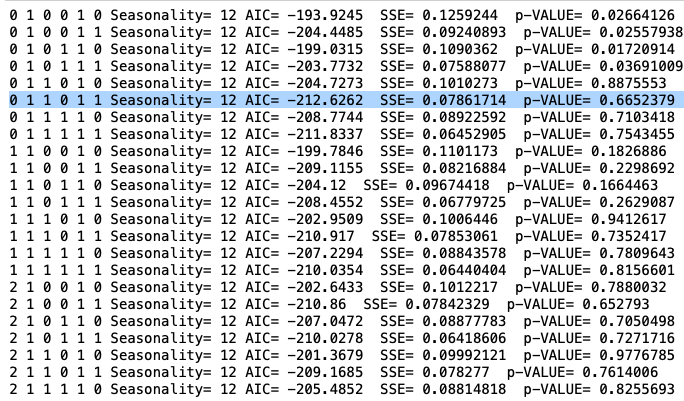

### Comparison with Auto-Arima Results

In [39]:
auto.arima(log(USAccDeaths))

Series: log(USAccDeaths) 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4713  -0.5926
s.e.   0.1230   0.1933

sigma^2 estimated as 0.001379:  log likelihood=109.31
AIC=-212.63   AICc=-212.19   BIC=-206.39

<b>Interpretation</b><br>
AutoARIMA provided same results as we got manually by comparing each combination.

### Residual Analysis

initial  value -3.079316 
iter   2 value -3.244609
iter   3 value -3.247685
iter   4 value -3.257643
iter   5 value -3.258186
iter   6 value -3.258228
iter   7 value -3.258229
iter   8 value -3.258230
iter   8 value -3.258230
iter   8 value -3.258230
final  value -3.258230 
converged
initial  value -3.265975 
iter   2 value -3.271137
iter   3 value -3.271591
iter   4 value -3.271703
iter   5 value -3.271703
iter   5 value -3.271703
iter   5 value -3.271703
final  value -3.271703 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1     sma1
      -0.4713  -0.5926
s.e.   0.1230   0.1933

sigma^2 estimated as 0.001313:  log likelihood = 109.31,  aic = -212.63

$degrees_of_freedom
[1] 57

$ttable
     Estimate     SE t.value p.value
ma1   -0.4713 0.1230 -3.8313  0.0003
sma1  -0.5926 0.1933 -3.0662  0.0033

$AIC
[1] -3.037517

$AICc
[1] -3.034958

$BIC
[1] -2.948479


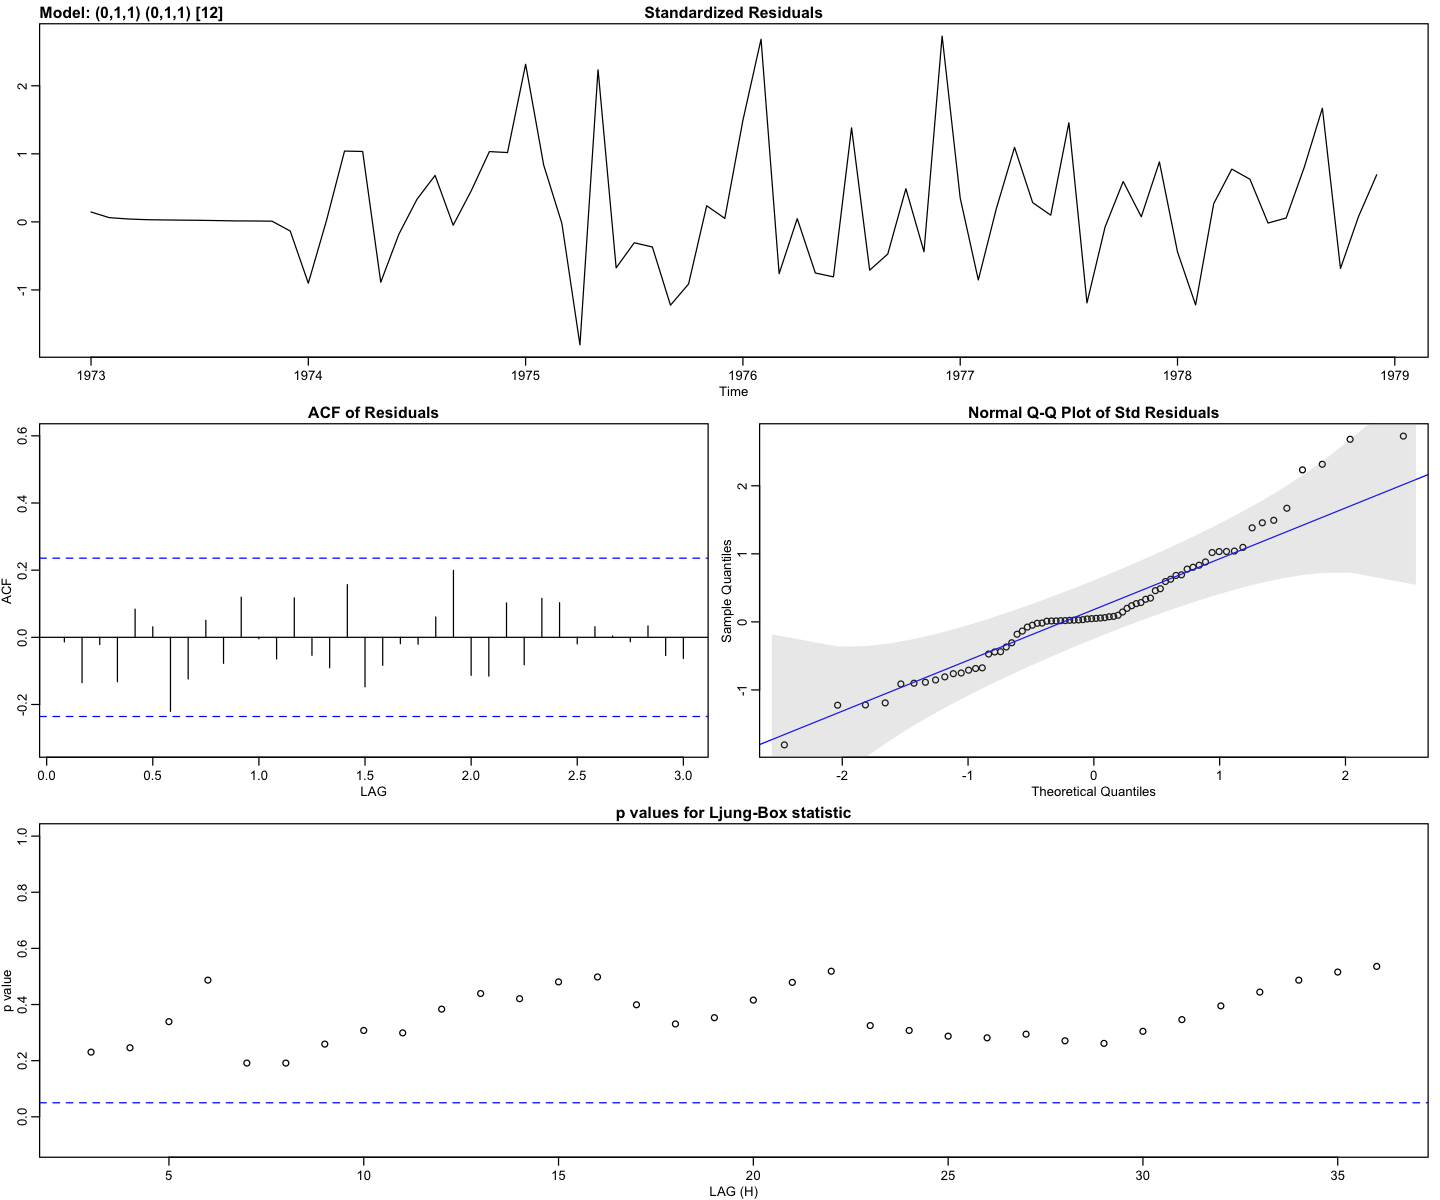

In [84]:
figsize(12,10)
sarima(log(USAccDeaths), 0,1,1,0,1,1,12)

### Forecasting Using "forecast" library

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 1979       8336.061 7931.798  8740.324 7717.794  8954.328
Feb 1979       7531.829 7066.619  7997.040 6820.351  8243.307
Mar 1979       8314.644 7795.594  8833.694 7520.825  9108.462
Apr 1979       8616.869 8049.062  9184.676 7748.483  9485.255
May 1979       9488.913 8876.216 10101.609 8551.874 10425.951
Jun 1979       9859.757 9205.243 10514.272 8858.764 10860.751

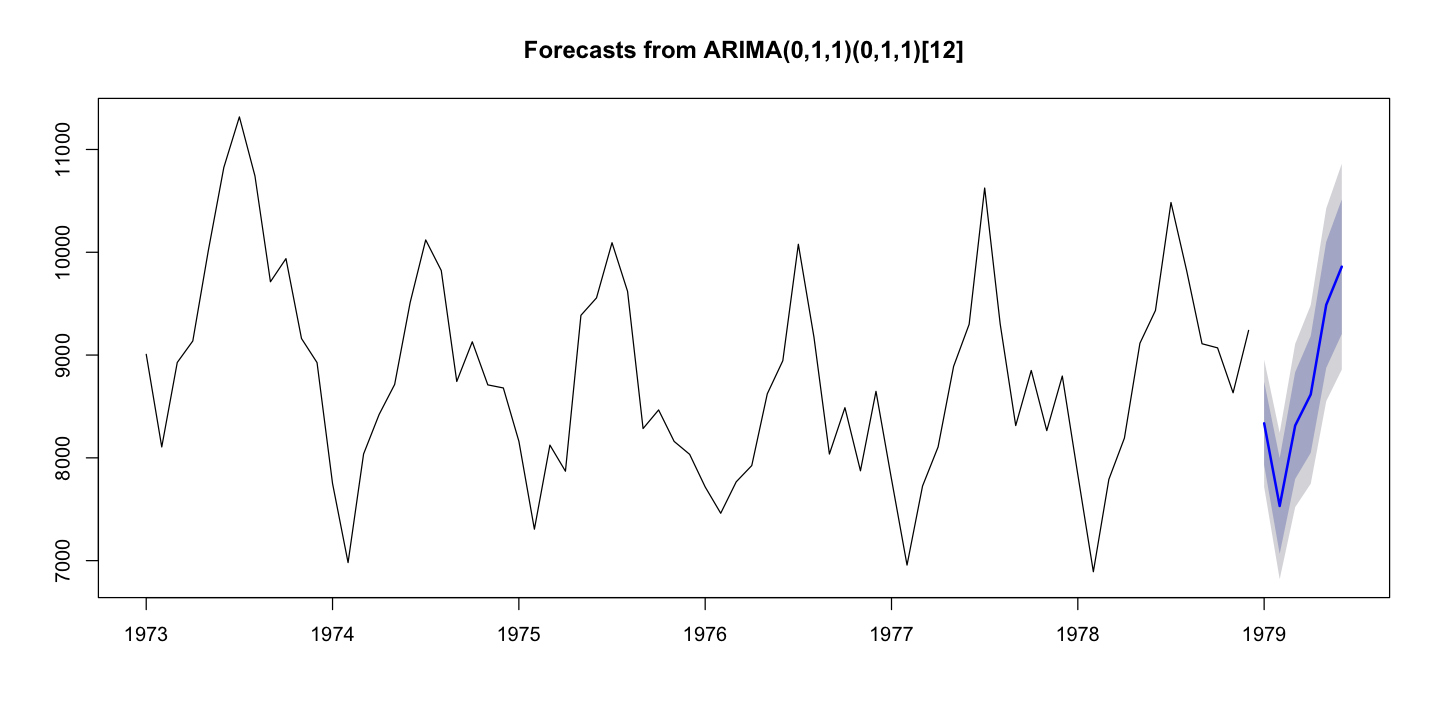

In [90]:
model<- arima(x=USAccDeaths, order = c(0,1,1), seasonal = list(order=c(0,1,1), period=12))
plot(forecast(model, h=6))
forecast(model, h=6)

### Forecasting Using "sarima.for" library

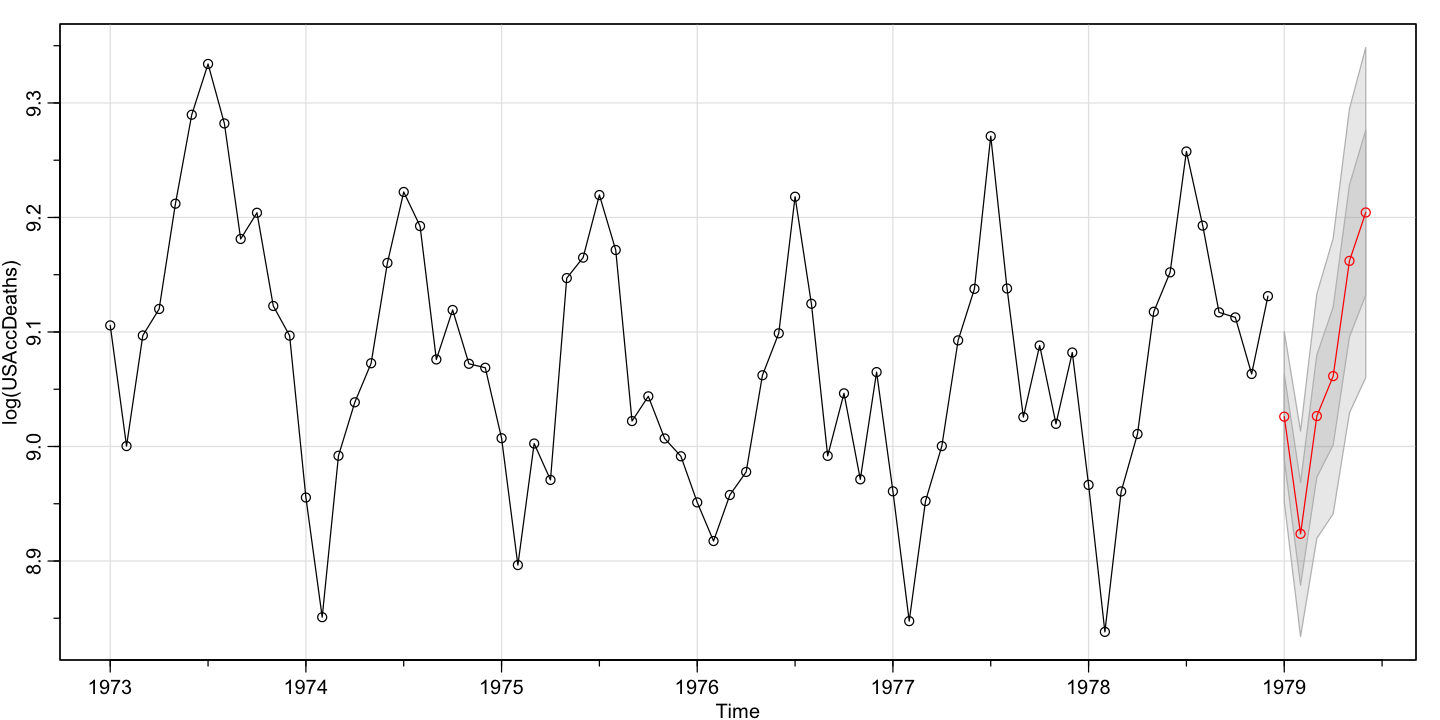

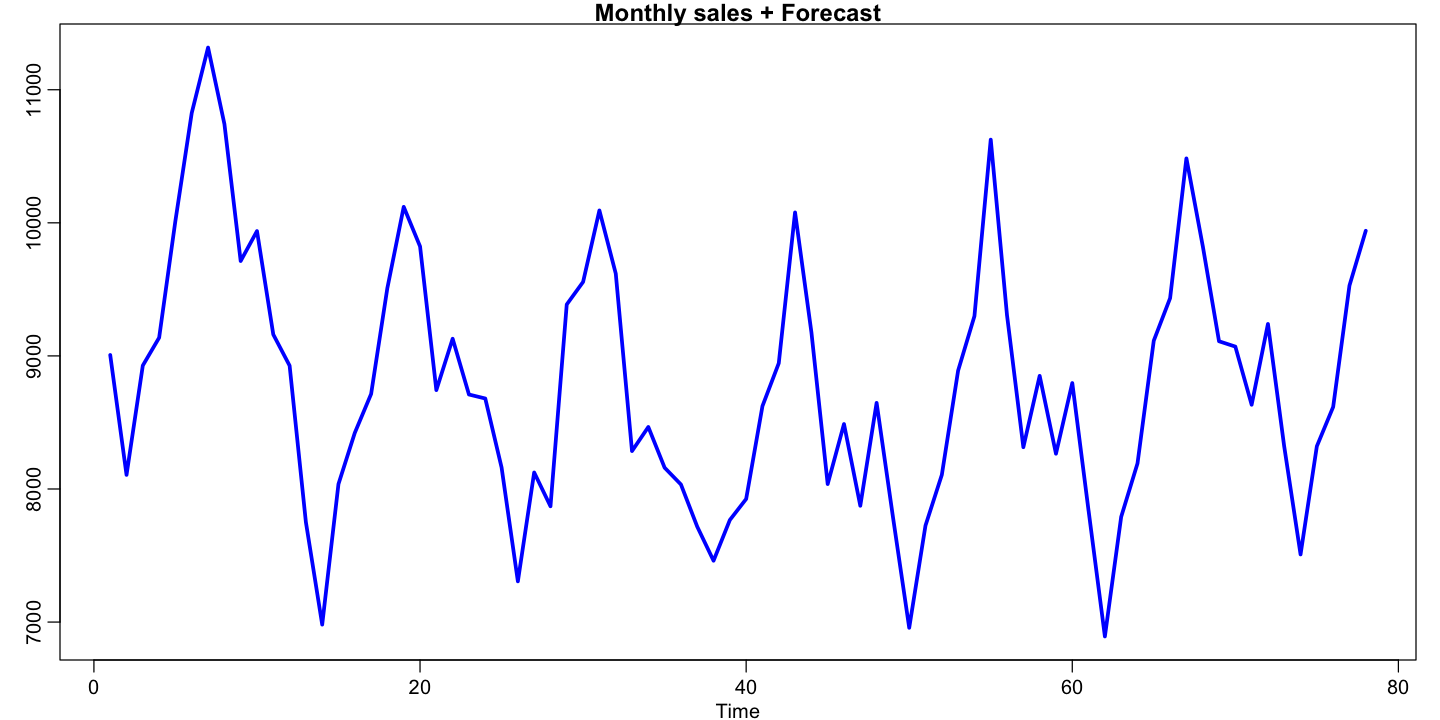

In [92]:
figsize()
a<-sarima.for(log(USAccDeaths),6,1,1,0,0,1,1,12)
plot.ts(c(USAccDeaths,exp(a$pred)), main='Monthly sales + Forecast', ylab='', col='blue', lwd=3)

### References
Coursera MOOC - Practical Time Series Analysis